<font color=purple > _**Emily Nordhoff - 2022**_ </font>

# Unsupervised Machine Learning

This script contains a k-means clustering model using pitch and hit variables from all balls in play in the MLB 
2021 season. Data was gathered from BaseballSavant.com.

### Contents

    1. Importing data and libraries
    2. Data prep for clustering
        2.1 Subset data
        2.2 Check for missing values
        2.3 Scale variables
    3. Elbow technique
    4. K-means clustering
    5. Visualizations and observations
    6. K-means clustering part II

## 1. Importing data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
path = r'/Users/Emily/Documents/CF Data Analysis Program/Immersion 6/Hits Analysis/'

In [3]:
df = pd.read_pickle(os.path.join(path,'02 data','prepared data','bip_ballparks_merged_gis.pkl'))

In [4]:
df.head()

pitch_type   game_date  release_speed        player_name  batter  pitcher  \
0         FC  2021-04-30           82.7       Altuve, Jose  514888   642232   
1         FC  2021-04-30           82.4  Maldonado, Martín  455117   642232   
2         CH  2021-04-30           83.8   Kiermaier, Kevin  595281   621121   
3         FC  2021-04-30           82.7       Straw, Myles  664702   642232   
4         SL  2021-04-30           88.0        Díaz, Yandy  650490   621121   

      events  zone stand p_throws  ... batter_home_away       contact  \
0  field_out   4.0     R        L  ...             away         Under   
1  field_out   8.0     R        L  ...             away  Flare/Burner   
2  field_out   5.0     L        R  ...             home         Under   
3  field_out  13.0     R        L  ...             away         Under   
4  field_out   8.0     R        R  ...             home        Barrel   

   runner_1b runner_2b  runner_3b  scoring_play   Latitude  Longitude  \
0        NaN       NaN        NaN         False  27.768284 -82.653961   
1        NaN       NaN        NaN         False  27.768284 -82.653961   
2        NaN       NaN        NaN         False  27.768284 -82.653961   
3        NaN       NaN        NaN         False  27.768284 -82.653961   
4        NaN       1.0        NaN         False  27.768284 -82.653961   

        park_city  park_state  
0  St. Petersburg     Florida  
1  St. Petersburg     Florida  
2  St. Petersburg     Florida  
3  St. Petersburg     Florida  
4  St. Petersburg     Florida  

[5 rows x 57 columns]

In [5]:
df.reset_index(inplace=True)
df.rename(columns={'index':'id'}, inplace=True)
df.head()

id pitch_type   game_date  release_speed        player_name  batter  \
0   0         FC  2021-04-30           82.7       Altuve, Jose  514888   
1   1         FC  2021-04-30           82.4  Maldonado, Martín  455117   
2   2         CH  2021-04-30           83.8   Kiermaier, Kevin  595281   
3   3         FC  2021-04-30           82.7       Straw, Myles  664702   
4   4         SL  2021-04-30           88.0        Díaz, Yandy  650490   

   pitcher     events  zone stand  ... batter_home_away       contact  \
0   642232  field_out   4.0     R  ...             away         Under   
1   642232  field_out   8.0     R  ...             away  Flare/Burner   
2   621121  field_out   5.0     L  ...             home         Under   
3   642232  field_out  13.0     R  ...             away         Under   
4   621121  field_out   8.0     R  ...             home        Barrel   

  runner_1b  runner_2b runner_3b  scoring_play   Latitude  Longitude  \
0       NaN        NaN       NaN         False  27.768284 -82.653961   
1       NaN        NaN       NaN         False  27.768284 -82.653961   
2       NaN        NaN       NaN         False  27.768284 -82.653961   
3       NaN        NaN       NaN         False  27.768284 -82.653961   
4       NaN        1.0       NaN         False  27.768284 -82.653961   

        park_city  park_state  
0  St. Petersburg     Florida  
1  St. Petersburg     Florida  
2  St. Petersburg     Florida  
3  St. Petersburg     Florida  
4  St. Petersburg     Florida  

[5 rows x 58 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121707 entries, 0 to 121706
Data columns (total 58 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     121707 non-null  int64  
 1   pitch_type             121654 non-null  object 
 2   game_date              121707 non-null  object 
 3   release_speed          121653 non-null  float64
 4   player_name            121707 non-null  object 
 5   batter                 121707 non-null  int64  
 6   pitcher                121707 non-null  int64  
 7   events                 121707 non-null  object 
 8   zone                   121654 non-null  float64
 9   stand                  121707 non-null  object 
 10  p_throws               121707 non-null  object 
 11  home_team              121707 non-null  object 
 12  away_team              121707 non-null  object 
 13  hit_location           115340 non-null  float64
 14  bb_type                121703 non-nu

## 2. Data prep for clustering model

### 2.1 Subset data

In [7]:
# identify all the useful numeric columns
# might have to slim this down to a smaller number of columns
# (or maybe perform PCA?!?!?)

columns = ['release_speed',
          'pfx_x',
          'pfx_z',
          'plate_x',
          'plate_z',
          'vx0',
          'vy0',
          'vz0',
          'ax',
          'ay',
          'az',
          'hit_distance_sc',
          'launch_speed',
          'launch_angle']

In [8]:
# subset for just the home runs

df2 = df[columns].loc[df['events'] == 'home_run']

In [9]:
df2.head()

release_speed  pfx_x  pfx_z  plate_x  plate_z       vx0         vy0  \
20            77.1   1.42   0.72     0.16     1.99 -8.067947 -111.990784   
56            88.6   0.14   0.82     0.71     2.28  4.478044 -129.057787   
59            89.0   1.05   0.85     0.24     2.55 -3.577797 -129.551960   
105           89.9   1.33   1.07     0.73     2.65 -5.732619 -130.785103   
137           96.2  -1.36   0.97    -0.26     2.61  5.752009 -139.900294   

          vz0         ax         ay         az  hit_distance_sc  launch_speed  \
20  -1.318431  13.510652  22.445496 -26.092514            405.0         103.0   
56  -3.210782   0.625105  26.799068 -22.556280            431.0         109.6   
59  -4.374543  12.599927  28.755035 -21.928535            382.0         103.9   
105 -4.905889  16.517801  29.189072 -19.022148            466.0         112.8   
137 -5.508058 -19.151922  33.500467 -18.359680            417.0         105.4   

     launch_angle  
20           27.0  
56           35.0  
59           22.0  
105          35.0  
137          29.0

### 2.2 Check for (and handle) missing values

In [10]:
df2.isnull().sum()

release_speed       9
pfx_x               9
pfx_z               9
plate_x             9
plate_z             9
vx0                 9
vy0                 9
vz0                 9
ax                  9
ay                  9
az                  9
hit_distance_sc    11
launch_speed       11
launch_angle       11
dtype: int64

In [11]:
# eliminate those records that have NaN values

df2.dropna(inplace=True)

In [12]:
df2.shape

(5933, 14)

### 2.3 Scaling

In [13]:
# create scaler object using StandardScaler from sklearn.preprocessing
# StandardScaler assumes data is normally distributed and scales with a distribution
# around 0 and standard deviation of 1. Scaling happens independently with each variable.

scaler = StandardScaler()

In [14]:
# create new df with scaled data

df_scaled = pd.DataFrame(scaler.fit_transform(df2), columns=columns)
df_scaled.head()

release_speed     pfx_x     pfx_z   plate_x   plate_z       vx0       vy0  \
0      -1.977271  1.869974 -0.073341  0.393492 -0.980440 -1.779509  2.009087   
1      -0.052922  0.312912  0.071211  1.730794 -0.394123  0.447199  0.034001   
2       0.014012  1.419886  0.114577  0.588009  0.151758 -0.982581 -0.023188   
3       0.164613  1.760493  0.432592  1.779424  0.353936 -1.365026 -0.165894   
4       1.218822 -1.511771  0.288040 -0.627720  0.273065  0.673307 -1.220753   

        vz0        ax        ay        az  hit_distance_sc  launch_speed  \
0  0.992534  1.536201 -1.031100 -0.466783         0.158925     -0.323204   
1  0.284120  0.266127  0.067151 -0.051368         1.162874      1.162340   
2 -0.151541  1.446435  0.560572  0.022375        -0.729184     -0.120629   
3 -0.350454  1.832603  0.670064  0.363799         2.514343      1.882604   
4 -0.575880 -1.683211  1.757675  0.441622         0.622286      0.216994   

   launch_angle  
0     -0.326891  
1      1.199178  
2     -1.280684  
3      1.199178  
4      0.054626

In [15]:
# just to compare the original vs. scaled data

df2.head()

release_speed  pfx_x  pfx_z  plate_x  plate_z       vx0         vy0  \
20            77.1   1.42   0.72     0.16     1.99 -8.067947 -111.990784   
56            88.6   0.14   0.82     0.71     2.28  4.478044 -129.057787   
59            89.0   1.05   0.85     0.24     2.55 -3.577797 -129.551960   
105           89.9   1.33   1.07     0.73     2.65 -5.732619 -130.785103   
137           96.2  -1.36   0.97    -0.26     2.61  5.752009 -139.900294   

          vz0         ax         ay         az  hit_distance_sc  launch_speed  \
20  -1.318431  13.510652  22.445496 -26.092514            405.0         103.0   
56  -3.210782   0.625105  26.799068 -22.556280            431.0         109.6   
59  -4.374543  12.599927  28.755035 -21.928535            382.0         103.9   
105 -4.905889  16.517801  29.189072 -19.022148            466.0         112.8   
137 -5.508058 -19.151922  33.500467 -18.359680            417.0         105.4   

     launch_angle  
20           27.0  
56           35.0  
59           22.0  
105          35.0  
137          29.0

## 3. Elbow technique

In [16]:
# Defines the range of potential clusters in the data.

num_cl = range(1, 10) 

# Defines k-means clusters in the range assigned above.

kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [17]:
# create a score that represents a rate of variation for each given cluster option

score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))]
score

[-83062.00000000007,
 -60665.0253512075,
 -51457.71014570684,
 -47911.95546891585,
 -45009.53820531068,
 -42798.74566801452,
 -40902.44948051645,
 -39717.44402223284,
 -38683.41882687904]

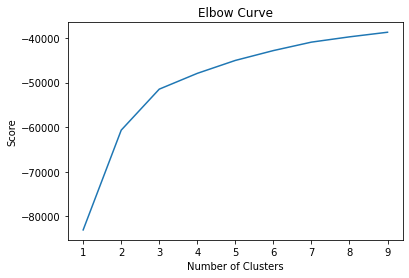

In [18]:
plt.plot(num_cl, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

This elbow curve is not very definitive on the appropriate number of clusters. The change in variation diminishes after 3 clusters, but just 3 might not account for the differences in the data. A few possible reasons: there are too many variables and maybe they should be reduced or more focused, the types of clusters aren't well identified, the data isn't normally distributed, so the incorrect scaler was used. <br> <br> Regardless, I'm going to move forward with the k-means clustering using 3 clusters.

## 4. K-means clustering

In [19]:
kmeans = KMeans(n_clusters = 4) 

In [20]:
kmeans.fit(df_scaled)

KMeans(n_clusters=4)

In [21]:
df_scaled['clusters_hr'] = kmeans.fit_predict(df_scaled)
df2['clusters_hr'] = kmeans.fit_predict(df_scaled)

In [22]:
df3 = df2.reset_index().rename(columns={'index': 'id'})
df3.head()

id  release_speed  pfx_x  pfx_z  plate_x  plate_z       vx0         vy0  \
0   20           77.1   1.42   0.72     0.16     1.99 -8.067947 -111.990784   
1   56           88.6   0.14   0.82     0.71     2.28  4.478044 -129.057787   
2   59           89.0   1.05   0.85     0.24     2.55 -3.577797 -129.551960   
3  105           89.9   1.33   1.07     0.73     2.65 -5.732619 -130.785103   
4  137           96.2  -1.36   0.97    -0.26     2.61  5.752009 -139.900294   

        vz0         ax         ay         az  hit_distance_sc  launch_speed  \
0 -1.318431  13.510652  22.445496 -26.092514            405.0         103.0   
1 -3.210782   0.625105  26.799068 -22.556280            431.0         109.6   
2 -4.374543  12.599927  28.755035 -21.928535            382.0         103.9   
3 -4.905889  16.517801  29.189072 -19.022148            466.0         112.8   
4 -5.508058 -19.151922  33.500467 -18.359680            417.0         105.4   

   launch_angle  clusters_hr  
0          27.0            3  
1          35.0            2  
2          22.0            0  
3          35.0            0  
4          29.0            1

In [23]:
df.head()

id pitch_type   game_date  release_speed        player_name  batter  \
0   0         FC  2021-04-30           82.7       Altuve, Jose  514888   
1   1         FC  2021-04-30           82.4  Maldonado, Martín  455117   
2   2         CH  2021-04-30           83.8   Kiermaier, Kevin  595281   
3   3         FC  2021-04-30           82.7       Straw, Myles  664702   
4   4         SL  2021-04-30           88.0        Díaz, Yandy  650490   

   pitcher     events  zone stand  ... batter_home_away       contact  \
0   642232  field_out   4.0     R  ...             away         Under   
1   642232  field_out   8.0     R  ...             away  Flare/Burner   
2   621121  field_out   5.0     L  ...             home         Under   
3   642232  field_out  13.0     R  ...             away         Under   
4   621121  field_out   8.0     R  ...             home        Barrel   

  runner_1b  runner_2b runner_3b  scoring_play   Latitude  Longitude  \
0       NaN        NaN       NaN         False  27.768284 -82.653961   
1       NaN        NaN       NaN         False  27.768284 -82.653961   
2       NaN        NaN       NaN         False  27.768284 -82.653961   
3       NaN        NaN       NaN         False  27.768284 -82.653961   
4       NaN        1.0       NaN         False  27.768284 -82.653961   

        park_city  park_state  
0  St. Petersburg     Florida  
1  St. Petersburg     Florida  
2  St. Petersburg     Florida  
3  St. Petersburg     Florida  
4  St. Petersburg     Florida  

[5 rows x 58 columns]

In [24]:
# df = pd.merge(df,df2[['Key_Column','Target_Column']],on='Key_Column', how='left')

df_merged = df.merge(df3[['id','clusters_hr']], on='id', how='left')
df_merged.head(21)

id pitch_type   game_date  release_speed        player_name  batter  \
0    0         FC  2021-04-30           82.7       Altuve, Jose  514888   
1    1         FC  2021-04-30           82.4  Maldonado, Martín  455117   
2    2         CH  2021-04-30           83.8   Kiermaier, Kevin  595281   
3    3         FC  2021-04-30           82.7       Straw, Myles  664702   
4    4         SL  2021-04-30           88.0        Díaz, Yandy  650490   
5    5         FC  2021-04-30           89.7      Lowe, Brandon  664040   
6    6         SI  2021-04-30           88.0       Tucker, Kyle  663656   
7    7         SI  2021-04-30           93.6     Margot, Manuel  622534   
8    8         SI  2021-04-30           91.5    Meadows, Austin  640457   
9    9         CU  2021-04-30           70.6      Díaz, Aledmys  649557   
10  10         SI  2021-04-30           94.1      Adames, Willy  642715   
11  11         SI  2021-04-30           86.8    Alvarez, Yordan  670541   
12  12         CH  2021-04-30           80.1  Brantley, Michael  488726   
13  13         FC  2021-04-30           82.9       Altuve, Jose  514888   
14  14         CU  2021-04-30           69.6  Maldonado, Martín  455117   
15  15         CH  2021-04-30           86.7       Wendle, Joey  621563   
16  16         SI  2021-04-30           93.0        Díaz, Yandy  650490   
17  17         FC  2021-04-30           81.1      Díaz, Aledmys  649557   
18  18         FC  2021-04-30           83.2     Correa, Carlos  621043   
19  19         FC  2021-04-30           82.1    Alvarez, Yordan  670541   
20  20         CH  2021-04-30           77.1      Bregman, Alex  608324   

    pitcher     events  zone stand  ...        contact runner_1b runner_2b  \
0    642232  field_out   4.0     R  ...          Under       NaN       NaN   
1    642232  field_out   8.0     R  ...   Flare/Burner       NaN       NaN   
2    621121  field_out   5.0     L  ...          Under       NaN       NaN   
3    642232  field_out  13.0     R  ...          Under       NaN       NaN   
4    621121  field_out   8.0     R  ...         Barrel       NaN       1.0   
5    621121     double   8.0     L  ...  Solid Contact       NaN       NaN   
6    642232  field_out   5.0     L  ...  Solid Contact       NaN       NaN   
7    621121  field_out   7.0     R  ...          Under       NaN       NaN   
8    621121  field_out   4.0     L  ...         Topped       1.0       NaN   
9    642232  field_out   5.0     R  ...          Under       NaN       NaN   
10   621121  force_out   9.0     R  ...         Topped       1.0       NaN   
11   642232  field_out   9.0     L  ...         Topped       1.0       NaN   
12   642232     single  14.0     L  ...   Flare/Burner       NaN       NaN   
13   642232  field_out   1.0     R  ...         Topped       NaN       NaN   
14   642232     triple   6.0     R  ...          Under       NaN       NaN   
15   621121  field_out   7.0     L  ...         Topped       NaN       NaN   
16   621121  field_out   4.0     R  ...         Topped       NaN       NaN   
17   642232  field_out   4.0     R  ...         Topped       NaN       1.0   
18   642232     double   5.0     R  ...          Under       1.0       NaN   
19   642232     single   8.0     L  ...  Solid Contact       NaN       NaN   
20   642232   home_run   8.0     R  ...         Barrel       1.0       NaN   

    runner_3b scoring_play   Latitude  Longitude       park_city  park_state  \
0         NaN        False  27.768284 -82.653961  St. Petersburg     Florida   
1         NaN        False  27.768284 -82.653961  St. Petersburg     Florida   
2         NaN        False  27.768284 -82.653961  St. Petersburg     Florida   
3         NaN        False  27.768284 -82.653961  St. Petersburg     Florida   
4         NaN        False  27.768284 -82.653961  St. Petersburg     Florida   
5         NaN        False  27.768284 -82.653961  St. Petersburg     Florida   
6         NaN        False  27.768284 -82.653961  St. Petersburg     Florida

In [25]:
df_merged_hr = df_merged.loc[df_merged['clusters_hr'].isnull() == False]

In [26]:
df2['clusters_hr'].value_counts()

1    2232
2    1429
3    1144
0    1128
Name: clusters_hr, dtype: int64

## 5. Visualizations and observations

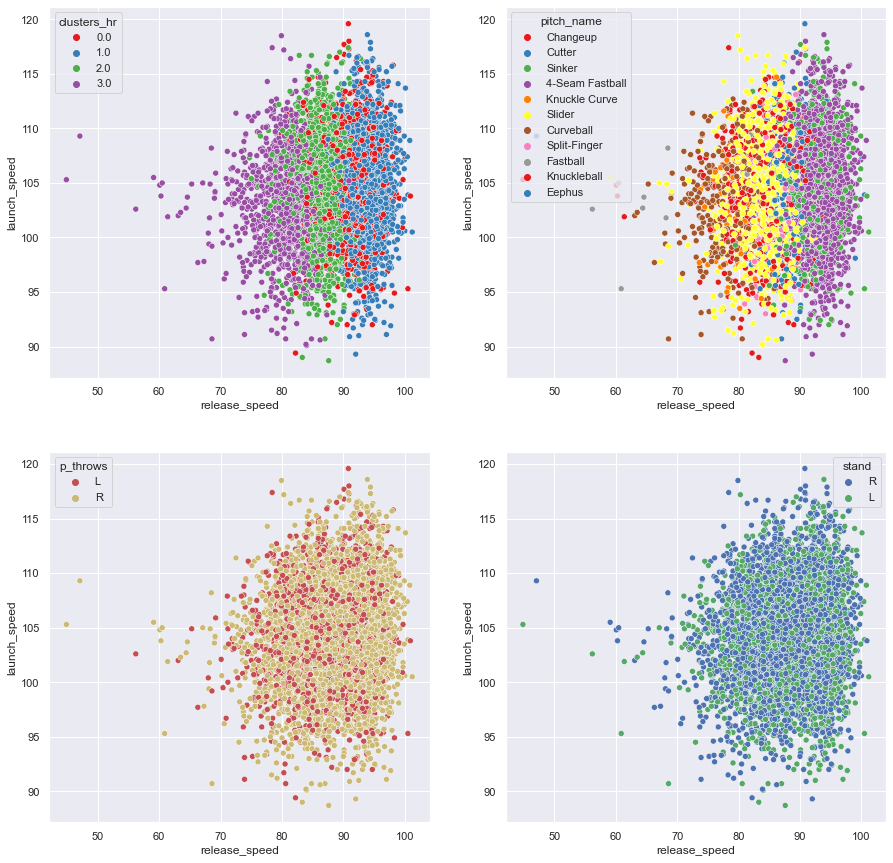

In [27]:
#set seaborn plotting aesthetics as default
sns.set_theme()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

sns.scatterplot(data=df_merged_hr, x='release_speed', y='launch_speed', hue='clusters_hr', palette='Set1', ax=axes[0,0])
sns.scatterplot(data=df_merged_hr, x='release_speed', y='launch_speed', hue='pitch_name', palette='Set1', ax=axes[0,1])
sns.scatterplot(data=df_merged_hr, x='release_speed', y='launch_speed', hue='p_throws', palette=['r','y'], ax=axes[1,0])
sns.scatterplot(data=df_merged_hr, x='release_speed', y='launch_speed', hue='stand', palette=['b','g'], ax=axes[1,1])

plt.show()

This scatterplot compares <strong>release speed of the pitch </strong> and <strong>speed of the ball off the bat </strong>. The clustering separates the data largely by speed of the pitch, irrespective of speed of the batted ball. 

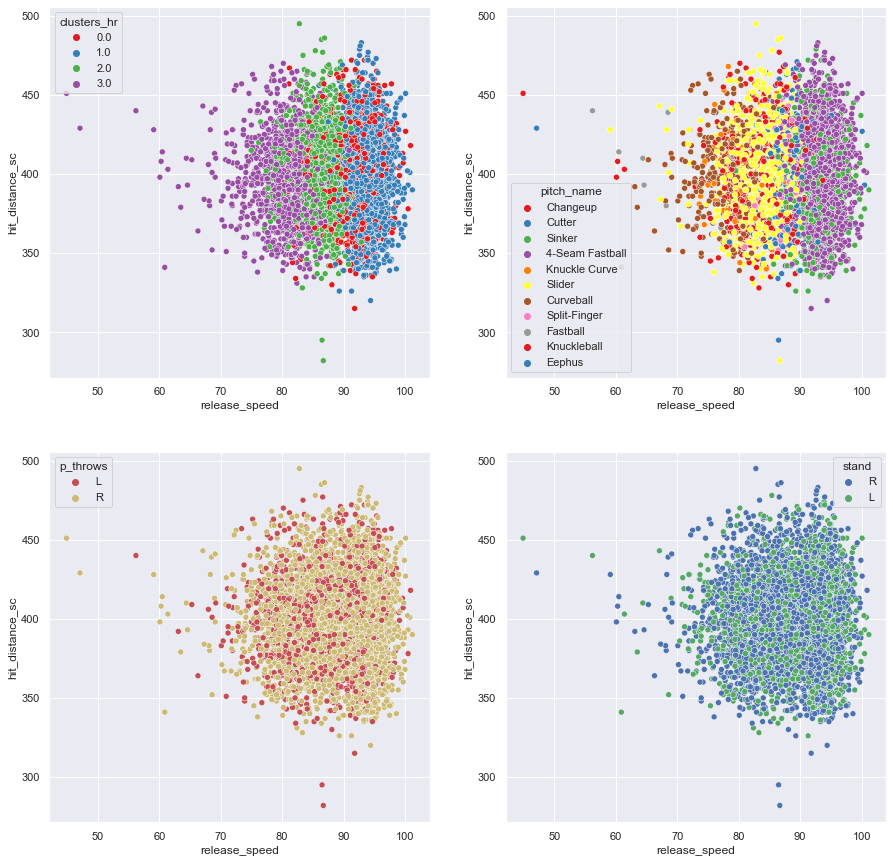

In [28]:
#set seaborn plotting aesthetics as default
sns.set_theme()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

sns.scatterplot(data=df_merged_hr, x='release_speed', y='hit_distance_sc', hue='clusters_hr', palette='Set1', ax=axes[0,0])
sns.scatterplot(data=df_merged_hr, x='release_speed', y='hit_distance_sc', hue='pitch_name', palette='Set1', ax=axes[0,1])
sns.scatterplot(data=df_merged_hr, x='release_speed', y='hit_distance_sc', hue='p_throws', palette=['r','y'], ax=axes[1,0])
sns.scatterplot(data=df_merged_hr, x='release_speed', y='hit_distance_sc', hue='stand', palette=['b','g'], ax=axes[1,1])

plt.show()

This scatterplot compares <strong>speed of the ball off the bat </strong>and the <strong>distance of the hit </strong>. The clustering doesn't yield any information with this plot. 

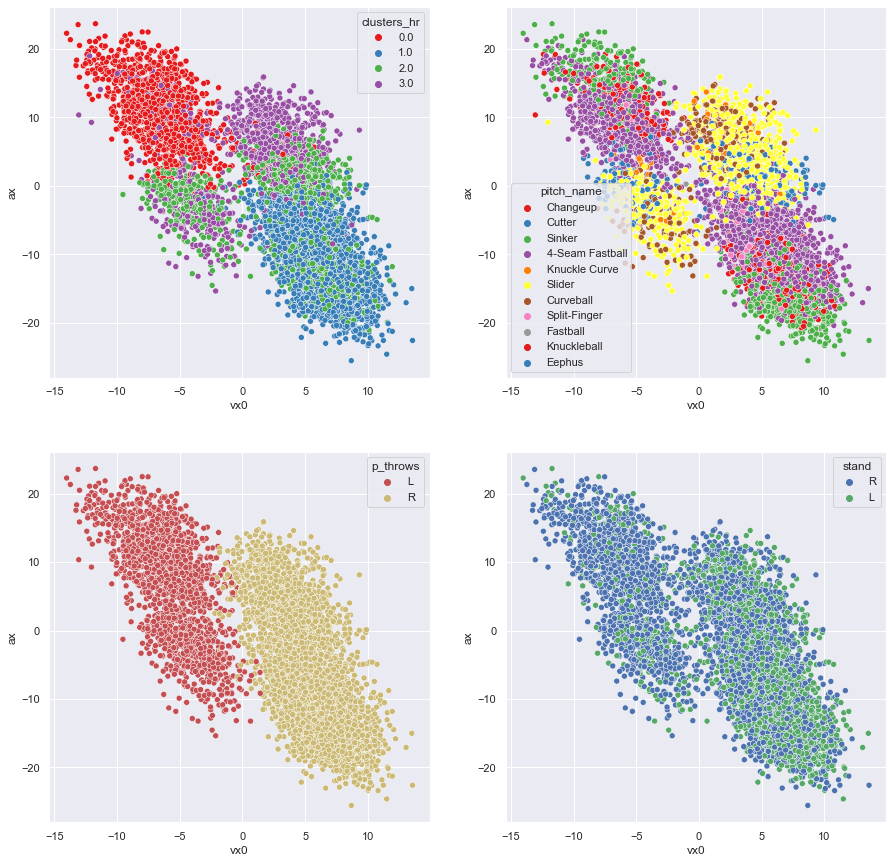

In [29]:
#set seaborn plotting aesthetics as default
sns.set_theme()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

sns.scatterplot(data=df_merged_hr, x='vx0', y='ax', hue='clusters_hr', palette='Set1', ax=axes[0,0])
sns.scatterplot(data=df_merged_hr, x='vx0', y='ax', hue='pitch_name', palette='Set1', ax=axes[0,1])
sns.scatterplot(data=df_merged_hr, x='vx0', y='ax', hue='p_throws', palette=['r','y'], ax=axes[1,0])
sns.scatterplot(data=df_merged_hr, x='vx0', y='ax', hue='stand', palette=['b','g'], ax=axes[1,1])

plt.show()

This scatterplot compares <strong>velocity of the pitch in the horizontal plane</strong> (in feet/second) and the <strong>acceleration of the pitch in the same plane</strong> (in ft/second/second). The scatterplot shows a negative relationship (linear-ish) between the two variables. The clustering groups together the pitches that have (absolute value of) high velocity and (absolute value of) and high acceleration while the third group has lower horizontal acceleration or velocity. It's interesting to see that there's a gap where velocity and acceleration are zero (which means no horizontal movement).

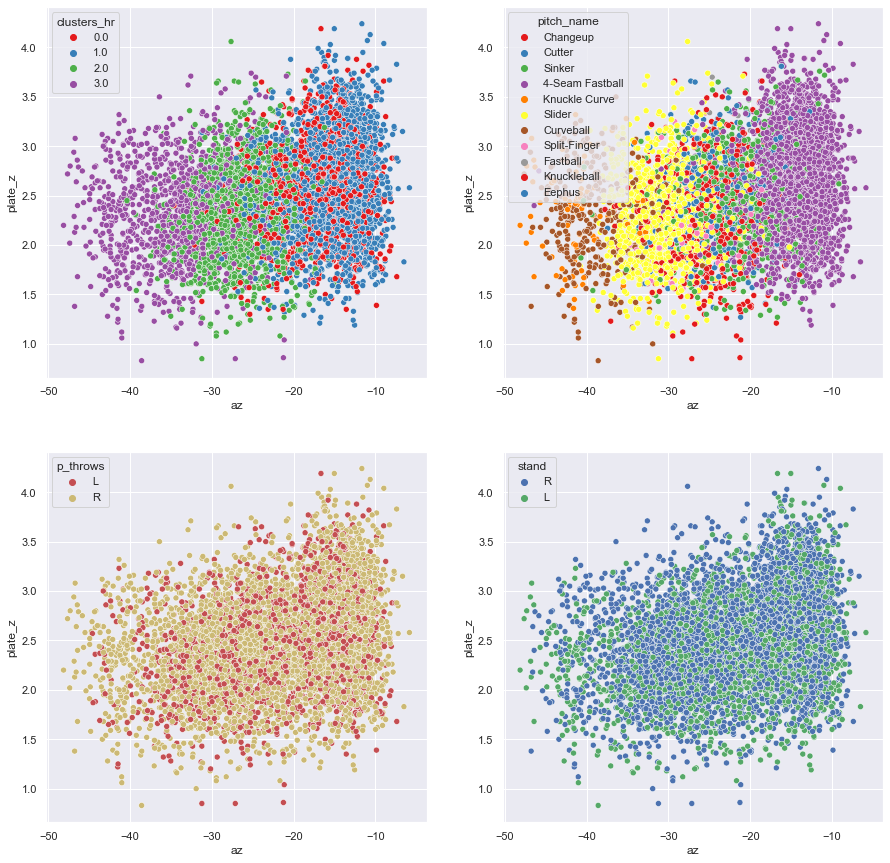

In [30]:
#set seaborn plotting aesthetics as default
sns.set_theme()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

sns.scatterplot(data=df_merged_hr, x='az', y='plate_z', hue='clusters_hr', palette='Set1', ax=axes[0,0])
sns.scatterplot(data=df_merged_hr, x='az', y='plate_z', hue='pitch_name', palette='Set1', ax=axes[0,1])
sns.scatterplot(data=df_merged_hr, x='az', y='plate_z', hue='p_throws', palette=['r','y'], ax=axes[1,0])
sns.scatterplot(data=df_merged_hr, x='az', y='plate_z', hue='stand', palette=['b','g'], ax=axes[1,1])

plt.show()

This scatterplot compares <strong>height of the ball when it crosses the plate</strong> (in feet) and the <strong>acceleration of the pitch in the vertical plane</strong> (in ft/second/second). The clustering is mostly due to the change in acceleration and not related to the height of the pitch. Similar to the previous task (6.4) this is another indication that the height of the pitch when it crosses the plate has little correlation to the rest of the stats of a home run.

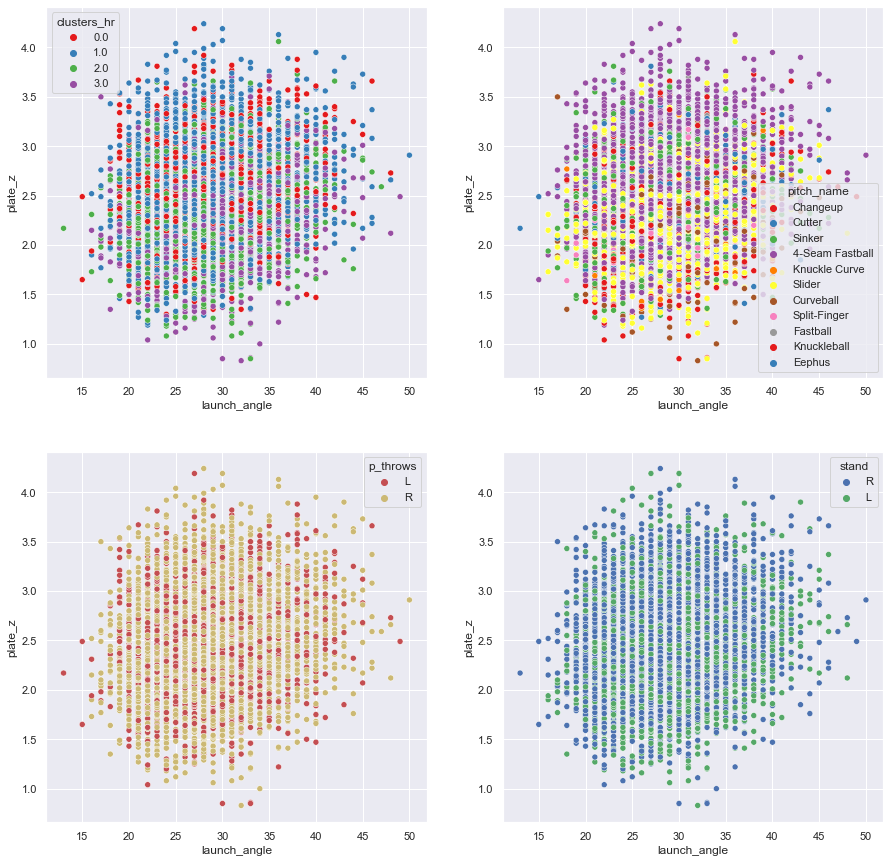

In [31]:
#set seaborn plotting aesthetics as default
sns.set_theme()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

sns.scatterplot(data=df_merged_hr, x='launch_angle', y='plate_z', hue='clusters_hr', palette='Set1', ax=axes[0,0])
sns.scatterplot(data=df_merged_hr, x='launch_angle', y='plate_z', hue='pitch_name', palette='Set1', ax=axes[0,1])
sns.scatterplot(data=df_merged_hr, x='launch_angle', y='plate_z', hue='p_throws', palette=['r','y'], ax=axes[1,0])
sns.scatterplot(data=df_merged_hr, x='launch_angle', y='plate_z', hue='stand', palette=['b','g'], ax=axes[1,1])

plt.show()

This scatterplot compares <strong>height of the ball when it crosses the plate</strong> (in feet) and the <strong>launch angle of the ball off the bat</strong>. There is no order to the clustering.

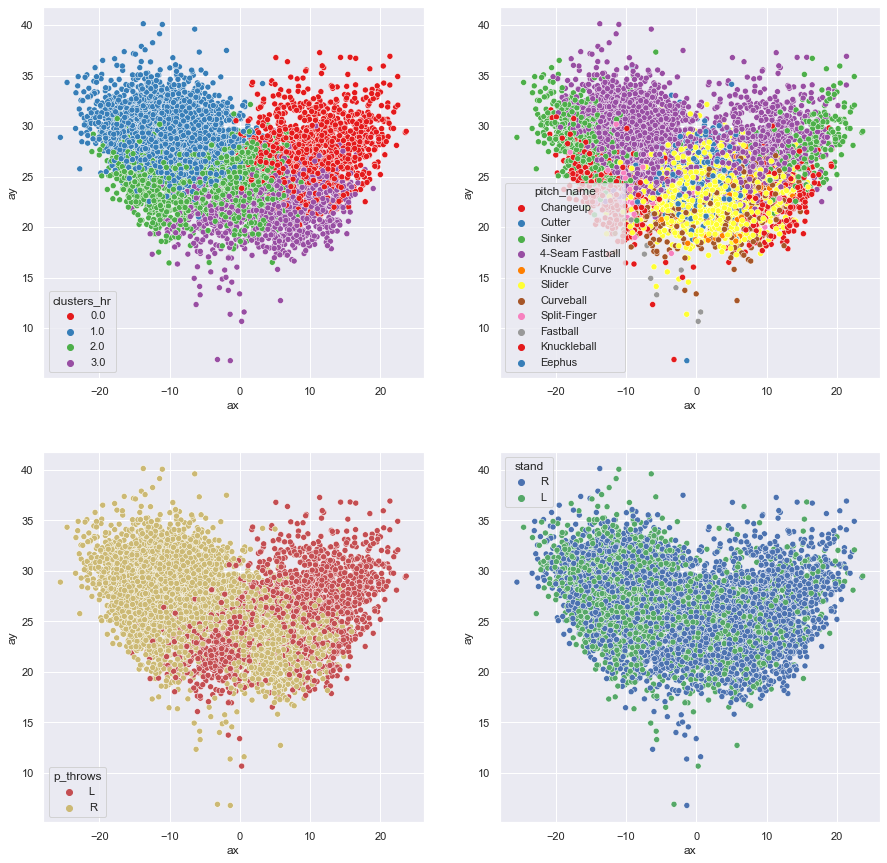

In [32]:
#set seaborn plotting aesthetics as default
sns.set_theme()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

sns.scatterplot(data=df_merged_hr, x='ax', y='ay', hue='clusters_hr', palette='Set1', ax=axes[0,0])
sns.scatterplot(data=df_merged_hr, x='ax', y='ay', hue='pitch_name', palette='Set1', ax=axes[0,1])
sns.scatterplot(data=df_merged_hr, x='ax', y='ay', hue='p_throws', palette=['r','y'], ax=axes[1,0])
sns.scatterplot(data=df_merged_hr, x='ax', y='ay', hue='stand', palette=['b','g'], ax=axes[1,1])

plt.show()


This scatterplot compares <strong>acceleration of the pitch in the horizontal (x) dimension </strong> (in feet/second/second) and the <strong>acceleration of the pitch in the front-to-back (y) dimension</strong> (the plane extending from the pitcher to the catcher in ft/second/second). Again, we see a noticable gap when ax is close to zero. What isn't taken into account here is the handedness of the pitchers, which would influence the ax significantly depending on which side of the body the ball was being released.

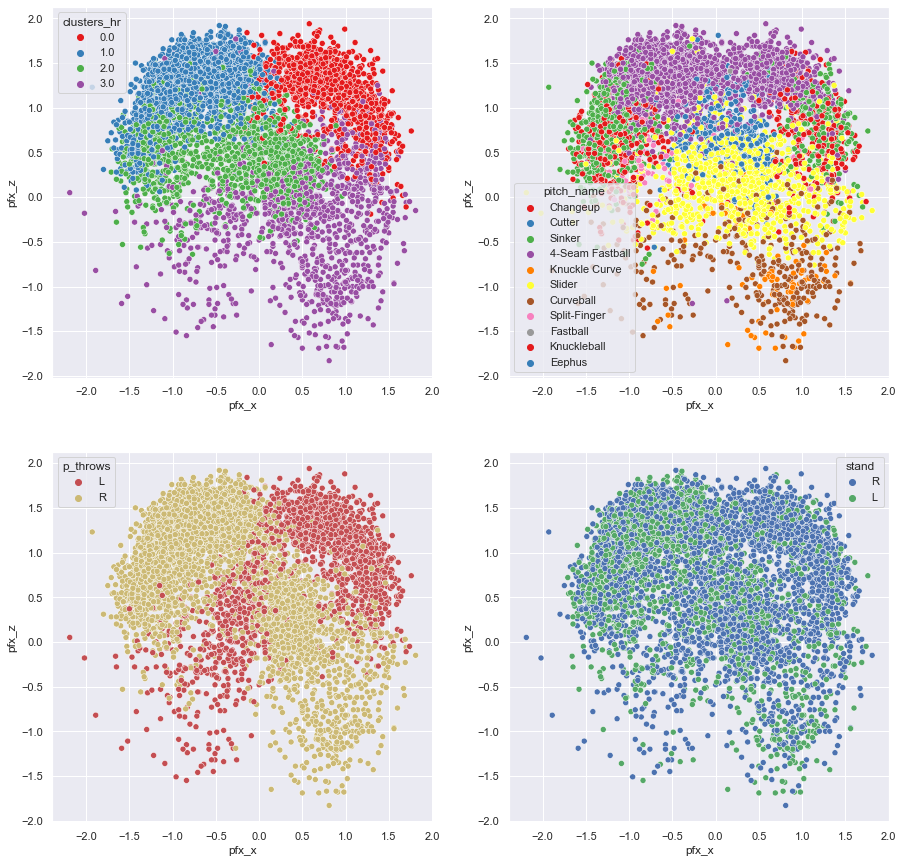

In [33]:
#set seaborn plotting aesthetics as default
sns.set_theme()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

sns.scatterplot(data=df_merged_hr, x='pfx_x', y='pfx_z', hue='clusters_hr', palette='Set1', ax=axes[0,0])
sns.scatterplot(data=df_merged_hr, x='pfx_x', y='pfx_z', hue='pitch_name', palette='Set1', ax=axes[0,1])
sns.scatterplot(data=df_merged_hr, x='pfx_x', y='pfx_z', hue='p_throws', palette=['r','y'], ax=axes[1,0])
sns.scatterplot(data=df_merged_hr, x='pfx_x', y='pfx_z', hue='stand', palette=['b','g'], ax=axes[1,1])

plt.show()

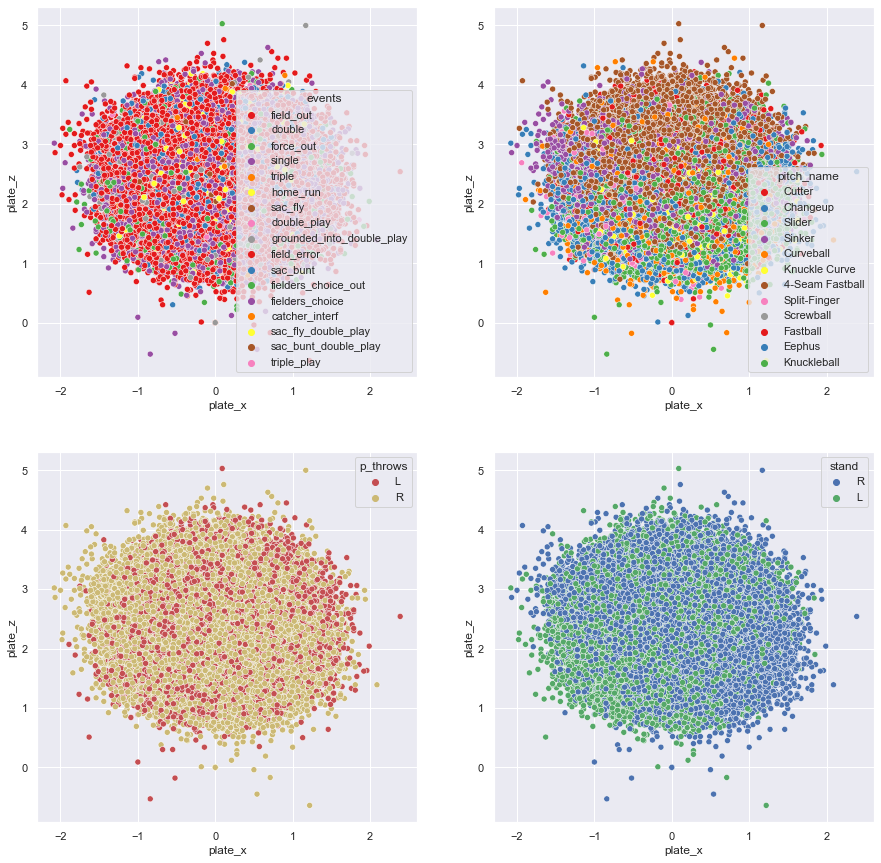

In [57]:
#set seaborn plotting aesthetics as default
sns.set_theme()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

sns.scatterplot(data=df_merged, x='plate_x', y='plate_z', hue='events', palette='Set1', ax=axes[0,0])
sns.scatterplot(data=df_merged, x='plate_x', y='plate_z', hue='pitch_name', palette='Set1', ax=axes[0,1])
sns.scatterplot(data=df_merged, x='plate_x', y='plate_z', hue='p_throws', palette=['r','y'], ax=axes[1,0])
sns.scatterplot(data=df_merged, x='plate_x', y='plate_z', hue='stand', palette=['b','g'], ax=axes[1,1])

plt.show()

In [36]:
df2.groupby('clusters_hr').agg({'release_speed':['mean', 'median'],
                            'pfx_x':['mean', 'median'],
                            'pfx_z':['mean', 'median'],
                            'plate_x':['mean', 'median'],
                            'plate_z':['mean', 'median'],
                            'vx0':['mean', 'median'],
                            'vy0':['mean', 'median'],
                            'vz0':['mean', 'median'],
                            'ax':['mean', 'median'],
                            'ay':['mean', 'median'],
                            'az':['mean', 'median'],
                            'hit_distance_sc':['mean', 'median'],
                            'launch_speed':['mean', 'median'],
                            'launch_angle':['mean', 'median']}).transpose()

clusters_hr                      0           1           2           3
release_speed   mean     91.392730   93.718459   86.366690   80.289860
                median   91.800000   93.800000   86.500000   80.900000
pfx_x           mean      0.810160   -0.731671   -0.368495    0.481005
                median    0.820000   -0.720000   -0.250000    0.610000
pfx_z           mean      1.178147    1.242957    0.483744   -0.193811
                median    1.240000    1.310000    0.480000   -0.160000
plate_x         mean      0.011135   -0.010511   -0.037047    0.046294
                median    0.020000   -0.010000   -0.040000    0.070000
plate_z         mean      2.555426    2.598006    2.336655    2.328199
                median    2.550000    2.580000    2.320000    2.330000
vx0             mean     -6.428258    6.106456    3.349471    0.396978
                median   -6.564589    6.078844    4.481045    1.630255
vy0             mean   -132.877072 -136.280944 -125.719812 -116.892466
                median -133.509709 -136.318287 -125.974515 -117.781682
vz0             mean     -5.250912   -5.589149   -3.175070   -0.539570
                median   -5.312030   -5.579752   -3.161747   -0.676084
ax              mean     10.934852  -10.473503   -4.478249    4.485525
                median   11.086494  -10.326123   -2.491917    5.269246
ay              mean     28.005825   29.576003   24.255087   21.988475
                median   28.018154   29.483860   24.228613   22.092796
az              mean    -17.202626  -15.642155  -26.596629  -34.010158
                median  -16.471246  -14.956083  -26.639473  -33.659575
hit_distance_sc mean    402.749113  400.918011  402.765570  396.629371
                median  404.000000  402.000000  404.000000  396.000000
launch_speed    mean    104.965337  104.841577  104.471798  103.077710
                median  105.100000  104.900000  104.600000  103.300000
launch_angle    mean     28.385638   28.722670   28.327502   29.501748
                median   28.000000   28.000000   28.000000   29.000000

## 6. K-means part II

The above clustering looked at all homeruns, while interesting and important, I feel it is too broad and lumping many different pitchers and hitters all into the same data set. In this next section, the same clustering will be done, but zeroing in on just one hitter: <strong>J.P. Crawford </strong>of the Seattle Mariners.

In [37]:
# subset for just the home runs

jp = df[columns].loc[df['player_name'] == 'Crawford, J.P.']

In [38]:
jp.shape

(510, 14)

In [39]:
# check for missing values

jp.isnull().sum()

release_speed      0
pfx_x              0
pfx_z              0
plate_x            0
plate_z            0
vx0                0
vy0                0
vz0                0
ax                 0
ay                 0
az                 0
hit_distance_sc    2
launch_speed       2
launch_angle       2
dtype: int64

In [40]:
jp = jp.loc[jp['launch_angle'].isnull() == False]

In [41]:
# scale the data set

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(jp), columns=columns)
df_scaled.head()

release_speed     pfx_x     pfx_z   plate_x   plate_z       vx0       vy0  \
0      -0.482385  0.294069 -0.190826 -1.216340 -0.506218 -1.468925  0.498903   
1      -1.702617  1.604584 -1.569728 -0.102019 -0.524336  0.072980  1.697995   
2       0.989072 -0.036408  1.130621  1.110049  0.852590  0.991399 -0.976029   
3       1.222352 -0.366886  1.460983  1.598786 -0.397514  1.364972 -1.178874   
4      -1.702617 -1.221569 -1.383002 -0.121569 -1.484560 -0.852483  1.718460   

        vz0        ax        ay        az  hit_distance_sc  launch_speed  \
0  0.485648  0.437872 -0.202436 -0.347368         0.474319     -0.030468   
1  1.135778  1.183796 -0.496771 -1.517876         0.426005     -0.254784   
2 -0.652677 -0.167137  1.228921  1.254820        -1.047546     -1.016098   
3 -1.479772 -0.570550  1.592567  1.732540         0.103918     -1.865779   
4  1.503657 -0.726444 -0.413292 -1.405663         1.537208      0.343391   

   launch_angle  
0      0.052970  
1      0.229535  
2     -0.653291  
3      1.394864  
4      0.547352

In [42]:
# Defines the range of potential clusters in the data.

num_cl = range(1, 10) 

# Defines k-means clusters in the range assigned above.

kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [43]:
# create a score that represents a rate of variation for each given cluster option

score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))]
score

[-7112.000000000002,
 -5248.547077300761,
 -4279.188335262728,
 -3933.9830696873432,
 -3687.5810112599092,
 -3489.4167920139116,
 -3294.61987340064,
 -3157.025610185214,
 -3007.1882450304893]

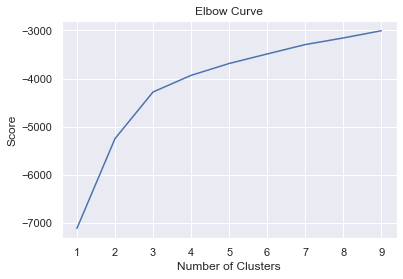

In [44]:
# plot the graph for the elbow technique

plt.plot(num_cl, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [58]:
kmeans = KMeans(n_clusters = 4) 
kmeans.fit(df_scaled)

KMeans(n_clusters=4)

In [59]:
df_scaled['clusters'] = kmeans.fit_predict(jp)
jp['clusters'] = kmeans.fit_predict(jp)

In [60]:
jp['clusters'].value_counts()

1    200
0    127
2     91
3     90
Name: clusters, dtype: int64

In [61]:
jp_hits = df.loc[df['player_name'] == 'Crawford, J.P.']
hits = ['single', 'double', 'triple', 'home_run']
hue_hits = jp_hits['events'].isin(hits)

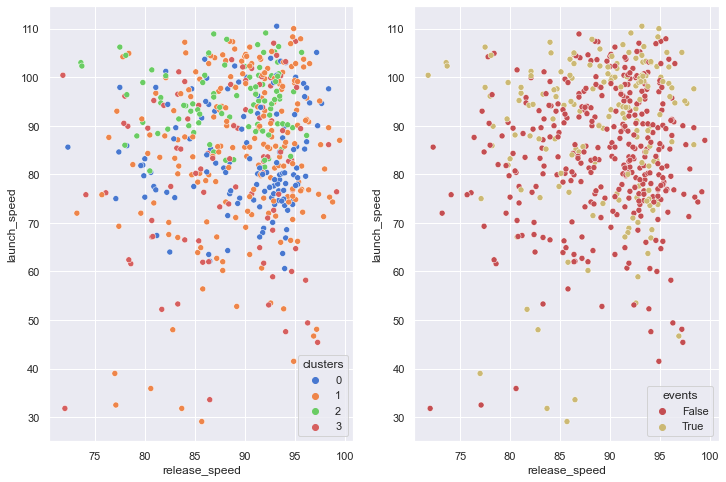

In [62]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

sns.scatterplot(data=jp, x='release_speed', y='launch_speed', hue='clusters', palette='muted', ax=axes[0])
sns.scatterplot(data=jp, x='release_speed', y='launch_speed', hue=hue_hits, palette=['r','y'], ax=axes[1])
plt.show()

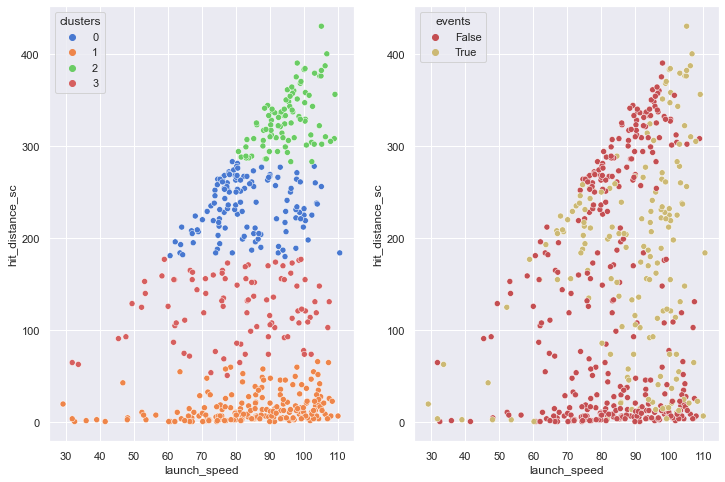

In [63]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

sns.scatterplot(data=jp, x='launch_speed', y='hit_distance_sc', hue='clusters', palette='muted', ax=axes[0])
sns.scatterplot(data=jp, x='launch_speed', y='hit_distance_sc', hue=hue_hits, palette=['r','y'], ax=axes[1])
plt.show()

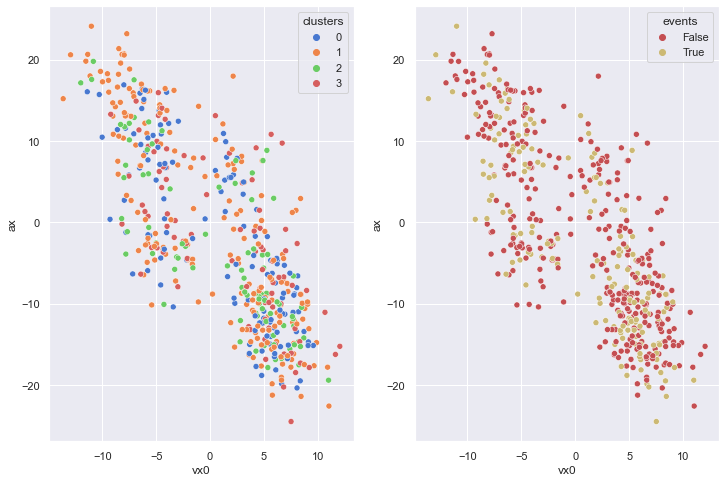

In [64]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

sns.scatterplot(data=jp,  x='vx0', y='ax', hue='clusters', palette='muted', ax=axes[0])
sns.scatterplot(data=jp,  x='vx0', y='ax', hue=hue_hits, palette=['r','y'], ax=axes[1])
plt.show()

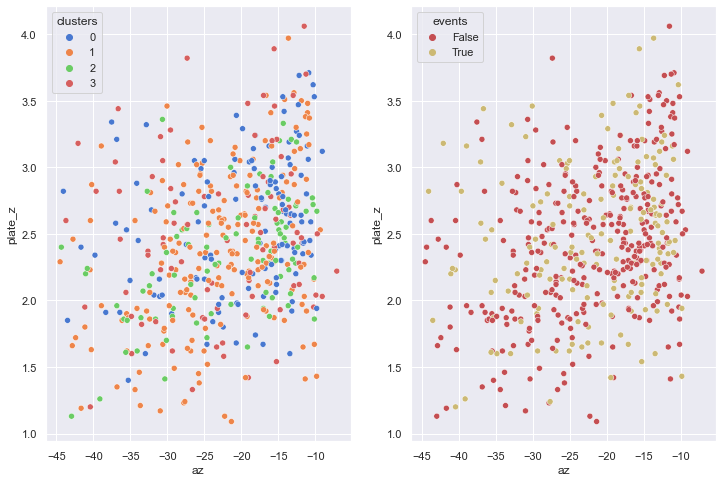

In [65]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

sns.scatterplot(data=jp, x='az', y='plate_z', hue='clusters', palette='muted', ax=axes[0])
sns.scatterplot(data=jp, x='az', y='plate_z', hue=hue_hits, palette=['r','y'], ax=axes[1])
plt.show()

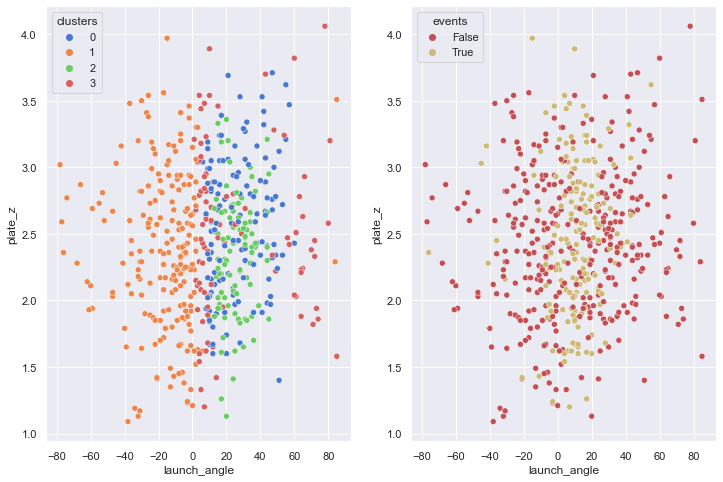

In [66]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

sns.scatterplot(data=jp, x='launch_angle', y='plate_z', hue='clusters', palette='muted', ax=axes[0])
sns.scatterplot(data=jp, x='launch_angle', y='plate_z', hue=hue_hits, palette=['r','y'], ax=axes[1])
plt.show()

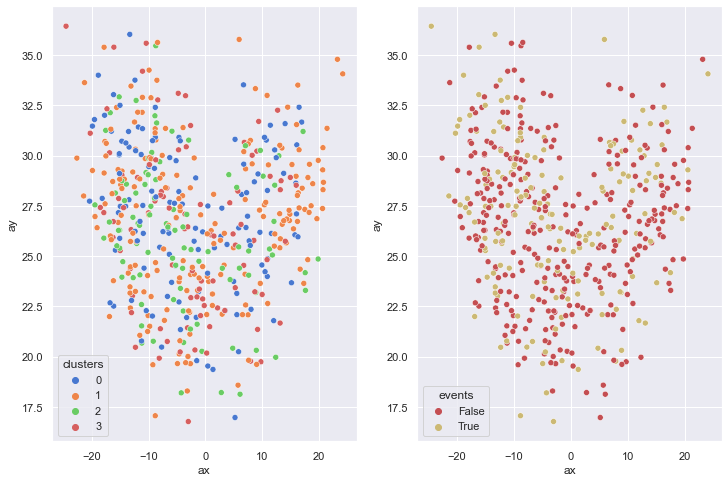

In [67]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

sns.scatterplot(data=jp, x='ax', y='ay', hue='clusters', palette='muted', ax=axes[0])
sns.scatterplot(data=jp, x='ax', y='ay', hue=hue_hits, palette=['r','y'], ax=axes[1])
plt.show()

I used the same scatter plots as in the above k-means clustering for the home runs, but I applied them to balls hit in play by J.P. Crawford. In addition, I color coded the same scatter plot with hits vs. no hits. This was to see if the clustering algorithm could identify hits. It didn't seem to yield the results I was hoping, but there are more ways to subset and run this clustering algoritm.